


## Load SCADA Data




In [3]:
import pandas as pd

df_scada = pd.read_csv('wind_time_series.csv')
df_scada.head()

,Timestamp,WindSpeed,Power
0,07-10-2014 02:00,7.567500,29.605953
1,07-10-2014 03:00,5.921667,12.383663
2,07-10-2014 04:00,6.256667,14.702530
3,07-10-2014 05:00,6.238333,15.391273
4,07-10-2014 06:00,6.951667,23.176807


In [4]:
from sklearn.preprocessing import StandardScaler

# 1. Convert 'Timestamp' column to datetime objects
df_scada['Timestamp'] = pd.to_datetime(df_scada['Timestamp'], format="%d-%m-%Y %H:%M")

# 2. Check for any missing values
print("Missing values before preprocessing:")
print(df_scada.isnull().sum())

# For this dummy data, no missing values are expected, but for real data, an imputation strategy might be needed.

# 3. Identify the numerical feature columns
numerical_features = ['WindSpeed', 'Power']

# 4. Initialize a StandardScaler object
scaler = StandardScaler()

# 5. Fit the scaler to the selected numerical features and transform them
df_scada[numerical_features] = scaler.fit_transform(df_scada[numerical_features])

# 6. Store the preprocessed data in a new DataFrame
df_preprocessed_scada = df_scada.copy()

print("\nPreprocessed SCADA Data (first 5 rows):")
df_preprocessed_scada.head()

Missing values before preprocessing:
Timestamp    0
WindSpeed    0
Power        0
dtype: int64

Preprocessed SCADA Data (first 5 rows):


,Timestamp,WindSpeed,Power
0,2014-10-07 02:00:00,0.346788,-0.042698
1,2014-10-07 03:00:00,-0.440626,-0.701591
2,2014-10-07 04:00:00,-0.280353,-0.612876
3,2014-10-07 05:00:00,-0.289124,-0.586525
4,2014-10-07 06:00:00,0.052155,-0.288665


## Apply Anomaly Detection Model



In [5]:
from sklearn.ensemble import IsolationForest

# 1. Initialize the IsolationForest model
# Using contamination='auto' and a random_state for reproducibility
model = IsolationForest(random_state=42)

# 2. Select the numerical features for training the model
# These were already identified and scaled in the previous step
numerical_features = ['WindSpeed', 'Power']
X = df_preprocessed_scada[numerical_features]

# 3. Fit the IsolationForest model to these selected features
model.fit(X)

# 4. Predict the anomaly scores for each data point
df_preprocessed_scada['anomaly_score'] = model.decision_function(X)

# 5. Predict the anomaly labels (-1 for anomalies, 1 for normal)
df_preprocessed_scada['anomaly_label'] = model.predict(X)

# Display the first few rows to inspect the newly added columns
print("SCADA Data with Anomaly Scores and Labels (first 5 rows):")
df_preprocessed_scada.head()

SCADA Data with Anomaly Scores and Labels (first 5 rows):


,Timestamp,WindSpeed,Power,anomaly_score,anomaly_label
0,2014-10-07 02:00:00,0.346788,-0.042698,0.027073,1
1,2014-10-07 03:00:00,-0.440626,-0.701591,0.059065,1
2,2014-10-07 04:00:00,-0.280353,-0.612876,0.058018,1
3,2014-10-07 05:00:00,-0.289124,-0.586525,0.057745,1
4,2014-10-07 06:00:00,0.052155,-0.288665,0.035439,1


## Visualize Anomalies




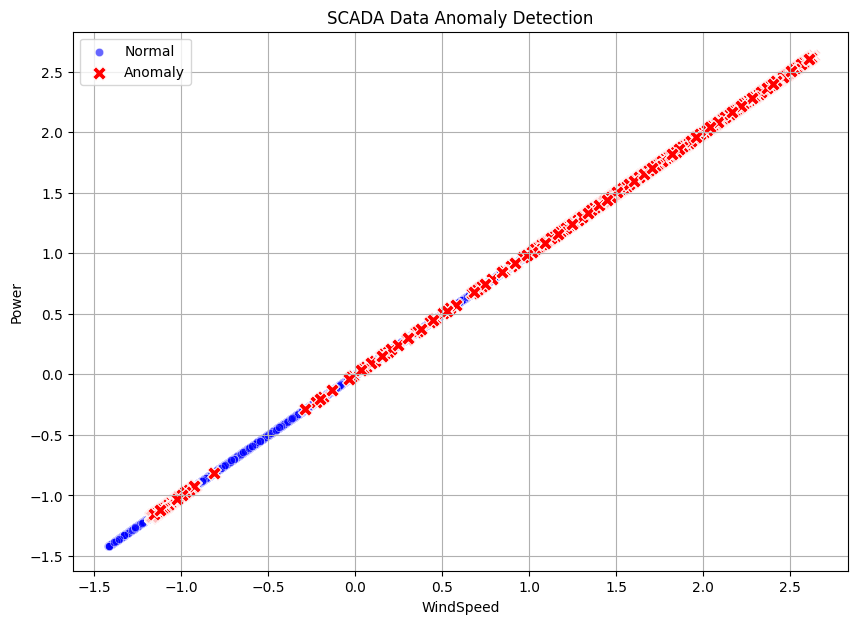

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data into normal and anomalous sets
df_normal = df_preprocessed_scada[df_preprocessed_scada['anomaly_label'] == 1]
df_anomaly = df_preprocessed_scada[df_preprocessed_scada['anomaly_label'] == -1]

# Create the scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_normal['WindSpeed'], y=df_normal['WindSpeed'], color='blue', label='Normal', alpha=0.6)
sns.scatterplot(x=df_anomaly['Power'], y=df_anomaly['Power'], color='red', label='Anomaly', s=100, marker='X')

# Add labels, title, and legend
plt.xlabel('WindSpeed')
plt.ylabel('Power')
plt.title('SCADA Data Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()